<a href="https://colab.research.google.com/github/Aayush015/Research_crypto_price_analysis/blob/main/Crypto_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description of the Project

This project aims to get crypto currency price predictions for the year 2024 based on news media sentiments, and reddit posts sentiments from the year 2017 - 2023. The idea is that we will collect hourly 10 popular reddit posts from 2017 - 2023, and collect hourly 10 popular news for four cryptos: bitcon, etherum, shiba-inu, and dogecoin. We will use this data with the data we collected for hourly crypto price data, and train a machine learning model to learn patterns. We will use this model to forecast the data for 2024, and test it against actual crypto fluctuations for 2024.

# Data Collection
First, we will collect crypto price data, reddit data, and traditional news data each from their own APIs.

In [ ]:
#!/usr/bin/env python
import requests
import pandas as pd
from datetime import datetime, timedelta
import time

def fetch_crypto_data_hourly(crypto_id, start_date, end_date):
    """
    Fetch hourly historical price, volume, and market cap data for a cryptocurrency from CoinCap API.

    :param crypto_id: Cryptocurrency ID (e.g., 'bitcoin', 'ethereum').
    :param start_date: Start date (datetime object).
    :param end_date: End date (datetime object).
    :return: List of historical hourly data for the cryptocurrency.
    """
    url = f"https://api.coincap.io/v2/assets/{crypto_id}/history"
    all_data = []

    # Fetch data in intervals to avoid API limitations
    while start_date < end_date:
        interval_end = min(start_date + timedelta(days=30), end_date)  # Fetch 1 month at a time
        params = {
            "interval": "h1",  # Hourly data
            "start": int(start_date.timestamp() * 1000),  # Start timestamp in ms
            "end": int(interval_end.timestamp() * 1000),  # End timestamp in ms
        }

        try:
            response = requests.get(url, params=params)
            response.raise_for_status()
            data = response.json().get("data", [])
            # Add the data to the collection
            all_data.extend(data)
        except requests.exceptions.RequestException as ex:
            print(f"Error fetching data for {crypto_id}: {ex}")
            break

        start_date = interval_end + timedelta(hours=1)  # Move to the next interval
        time.sleep(1)  # Sleep to respect API rate limits

    return all_data

def save_to_csv(data, filename):
    """
    Save data to a CSV file.

    :param data: List of historical price data.
    :param filename: Output CSV filename.
    """
    if not data:
        print("No data to save.")
        return

    # Convert the data to a pandas DataFrame
    df = pd.DataFrame(data)
    # Ensure timestamps are in human-readable format
    df["time"] = pd.to_datetime(df["time"], unit="ms")
    # Rename columns for clarity
    df.rename(columns={"priceUsd": "price_usd", "volumeUsd24Hr": "volume_usd", "marketCapUsd": "market_cap"}, inplace=True)
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

def run():
    """
    Main function to fetch and save hourly historical data for specified cryptocurrencies.
    """
    # Cryptocurrencies of interest
    cryptos = {
        "bitcoin": "bitcoin",
        "ethereum": "ethereum",
        "dogecoin": "dogecoin",
        "shiba-inu": "shiba-inu",
        "uniswap": "uniswap",
        "aave": "aave",
        "compound": "compound",
        "flow": "flow",
        "decentraland": "decentraland",
        "the-sandbox": "the-sandbox",
    }

    # Start and end dates
    start_date = datetime(2021, 10, 12)  # Start date (YYYY, MM, DD)
    end_date = datetime(2023, 12, 19)    # End date (YYYY, MM, DD)

    for crypto_name, crypto_id in cryptos.items():
        print(f"Fetching hourly data for {crypto_name}...")
        data = fetch_crypto_data_hourly(crypto_id, start_date, end_date)

        # Add a column identifying the cryptocurrency
        for entry in data:
            entry["crypto"] = crypto_name

        # Save data to a CSV file
        filename = f"{crypto_name}_hourly_2021-10-12_to_2023-12-19.csv"
        save_to_csv(data, filename)

    print("Hourly data collection completed.")

if __name__ == "__main__":
    run()


Fetching hourly data for bitcoin...
Data saved to bitcoin_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for ethereum...
Data saved to ethereum_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for dogecoin...
Data saved to dogecoin_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for shiba-inu...
Data saved to shiba-inu_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for uniswap...
Data saved to uniswap_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for aave...
Data saved to aave_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for compound...
Data saved to compound_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for flow...
Data saved to flow_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for decentraland...
Data saved to decentraland_hourly_2021-10-12_to_2023-12-19.csv
Fetching hourly data for the-sandbox...
Data saved to the-sandbox_hourly_2021-10-12_to_2023-12-19.csv
Hourly data collection completed.


# Merge Altcoins into one, Nfts into one, and Defi into one.

In [ ]:
import pandas as pd
from datetime import datetime

# Define category mappings
altcoin_coins = ["shiba-inu", "dogecoin"]
nft_coins = ["flow", "decentraland", "the-sandbox"]
defi_coins = ["uniswap", "aave", "compound"]
standalone_coins = ["bitcoin", "ethereum"]

# Function to load and process price data for each category
def load_price_data(coin_list, category_label):
    combined_df = pd.DataFrame()
    for coin in coin_list:
        file_path = f"{coin}_hourly_2021-10-12_to_2023-12-19.csv"
        df = pd.read_csv(file_path)
        df["time"] = pd.to_datetime(df["time"])
        df["category"] = category_label
        df["coin"] = coin
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    return combined_df

# Process each category
altcoin_data = load_price_data(altcoin_coins, "altcoin")
nft_data = load_price_data(nft_coins, "nft")
defi_data = load_price_data(defi_coins, "defi")
bitcoin_data = load_price_data(["bitcoin"], "bitcoin")
ethereum_data = load_price_data(["ethereum"], "ethereum")

# Combine all categories into a single dataset
all_price_data = pd.concat([altcoin_data, nft_data, defi_data, bitcoin_data, ethereum_data], ignore_index=True)

# Save combined price data to a file
all_price_data.to_csv("combined_price_data.csv", index=False)
print("Combined price data saved to 'combined_price_data.csv'")

FileNotFoundError: [Errno 2] No such file or directory: 'shiba-inu_hourly_2021-10-12_to_2023-12-19.csv'

## Merge News and Price data

* Preprocess news data (sentiment components get extracted into a separated columns using eval()).
* Round news data to its nearest hour.

In [ ]:
import pandas as pd
import ast  # For safely evaluating the sentiment dictionary string

# Load the datasets
news_data = pd.read_csv("cryptonews.csv")
price_data = pd.read_csv("combined_price_data.csv")

# Ensure proper datetime format
news_data['date'] = pd.to_datetime(news_data['date'], format='mixed', errors='coerce')  # Handle mixed formats
price_data['time'] = pd.to_datetime(price_data['time'])

# Round news timestamps to the nearest hour
news_data['rounded_time'] = news_data['date'].dt.round('h')

# Parse the sentiment dictionary into separate columns
def parse_sentiment(sentiment_str):
    try:
        sentiment_dict = ast.literal_eval(sentiment_str)  # Safely evaluate the string
        return pd.Series({
            "sentiment_class": sentiment_dict.get("class"),
            "sentiment_polarity": sentiment_dict.get("polarity"),
            "sentiment_subjectivity": sentiment_dict.get("subjectivity")
        })
    except:
        return pd.Series({
            "sentiment_class": None,
            "sentiment_polarity": None,
            "sentiment_subjectivity": None
        })

# Apply parsing function
sentiment_data = news_data['sentiment'].apply(parse_sentiment)
news_data = pd.concat([news_data, sentiment_data], axis=1)

# Select additional fields to retain in the merged dataset
news_data = news_data[['rounded_time', 'sentiment_class', 'sentiment_polarity',
                       'sentiment_subjectivity', 'text', 'title']]

# Merge the news data with price data
merged_data = pd.merge(price_data, news_data, left_on='time', right_on='rounded_time', how='left')

# Save the merged dataset
merged_data.to_csv("merged_price_news_data.csv", index=False)
print("Merged data saved to 'merged_price_news_data.csv'")


Merged data saved to 'merged_price_news_data.csv'


# Handle Missing Values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the merged data
merged_data = pd.read_csv("merged_price_news_data.csv")

# Ensure datetime format
merged_data['time'] = pd.to_datetime(merged_data['time'])

# Step 1: Handle Missing Values
# Fill missing sentiment data with neutral defaults
merged_data['sentiment_class'] = merged_data['sentiment_class'].fillna('neutral')
merged_data['sentiment_polarity'] = merged_data['sentiment_polarity'].fillna(0.0)
merged_data['sentiment_subjectivity'] = merged_data['sentiment_subjectivity'].fillna(0.5)

# Interpolate missing price data
merged_data['price_usd'] = merged_data['price_usd'].interpolate(method='linear')

# Step 2: Create Lagged Features
for lag in range(1, 4):  # Create 1, 2, 3-hour lags
    merged_data[f'price_usd_lag{lag}'] = merged_data['price_usd'].shift(lag)
    merged_data[f'sentiment_polarity_lag{lag}'] = merged_data['sentiment_polarity'].shift(lag)
    merged_data[f'sentiment_subjectivity_lag{lag}'] = merged_data['sentiment_subjectivity'].shift(lag)

# Step 3: Calculate Moving Averages and Volatility
merged_data['price_usd_ma7'] = merged_data['price_usd'].rolling(window=7).mean()
merged_data['price_usd_std7'] = merged_data['price_usd'].rolling(window=7).std()

# Step 4: Encode Sentiment Class
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
merged_data['sentiment_class_encoded'] = merged_data['sentiment_class'].map(sentiment_mapping)

# Step 5: Drop Rows with NaN (due to lagging and rolling operations)
merged_data.dropna(inplace=True)

# Step 6: Split Data
# Training: 2021-10-12 to 2022-12-31
# Validation: 2023-01-01 to 2023-09-30
# Testing: 2023-10-01 to 2023-12-19
train_data = merged_data[merged_data['time'] < '2023-01-01']
val_data = merged_data[(merged_data['time'] >= '2023-01-01') & (merged_data['time'] < '2023-10-01')]
test_data = merged_data[merged_data['time'] >= '2023-10-01']

# Step 7: Normalize Features Separately
# Define columns to scale (excluding the original price)
scaled_columns = ['price_usd_ma7', 'price_usd_std7', 'price_usd_lag1', 'price_usd_lag2', 'price_usd_lag3']

# Function to scale a dataset
def scale_data(data, scaler=None, fit=True):
    if fit:
        scaler = MinMaxScaler()
        data[scaled_columns] = scaler.fit_transform(data[scaled_columns])
    else:
        data[scaled_columns] = scaler.transform(data[scaled_columns])
    return data, scaler

# Scale training data
train_data, train_scaler = scale_data(train_data, fit=True)

# Scale validation and test data using training scaler
val_data, _ = scale_data(val_data, scaler=train_scaler, fit=False)
test_data, _ = scale_data(test_data, scaler=train_scaler, fit=False)

# Preserve Original Prices
# Ensure the original `price_usd` column is intact for all splits
train_data['original_price_usd'] = train_data['price_usd']
val_data['original_price_usd'] = val_data['price_usd']
test_data['original_price_usd'] = test_data['price_usd']

# Save datasets
train_data.to_csv("train_data.csv", index=False)
val_data.to_csv("val_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

print("Feature engineering and splitting completed. Datasets saved for training, validation, and testing.")

<ipython-input-21-5d3a121c54f5>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[scaled_columns] = scaler.fit_transform(data[scaled_columns])
<ipython-input-21-5d3a121c54f5>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[scaled_columns] = scaler.transform(data[scaled_columns])
<ipython-input-21-5d3a121c54f5>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

Feature engineering and splitting completed. Datasets saved for training, validation, and testing.


# Predictions

# Visualize Predictions

In [ ]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv("train_data.csv")
val_data = pd.read_csv("val_data.csv")
test_data = pd.read_csv("test_data.csv")

# Ensure datetime format
train_data['time'] = pd.to_datetime(train_data['time'])
val_data['time'] = pd.to_datetime(val_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

# Step 1: Check Original Prices for All Categories
print("\n=== Original Data Statistics ===")
for file_name, data in [("Train", train_data), ("Validation", val_data), ("Test", test_data)]:
    print(f"\n{file_name} Data:")
    for category in data['category'].unique():
        category_data = data[data['category'] == category]
        print(f"  {category} - Price Statistics:")
        print(category_data['price_usd'].describe())

# Step 2: Verify Aggregation/Filtering for a Specific Category
categories = test_data['category'].unique()

for category in categories:
    print(f"\nProcessing category: {category}")

    # Filter data for this category
    train_category = train_data[train_data['category'] == category]
    val_category = val_data[val_data['category'] == category]
    test_category = test_data[test_data['category'] == category]

    print(f"\nData Overview for {category}:")
    print(f"  Train: {train_category['price_usd'].describe()}")
    print(f"  Validation: {val_category['price_usd'].describe()}")
    print(f"  Test: {test_category['price_usd'].describe()}")

    # Step 3: Verify Scaling and Inverse Transform for `price_usd`
    from sklearn.preprocessing import MinMaxScaler

    target_scaler = MinMaxScaler()

    # Fit scaler on training target
    train_target_scaled = target_scaler.fit_transform(train_category[['price_usd']])
    test_target_scaled = target_scaler.transform(test_category[['price_usd']])

    # Inverse Transform
    test_target_inverse = target_scaler.inverse_transform(test_target_scaled)

    print(f"\nScaling Check for {category}:")
    print(f"  Original Test Prices - Min: {test_category['price_usd'].min()}, Max: {test_category['price_usd'].max()}")
    print(f"  Scaled Test Prices - Min: {test_target_scaled.min()}, Max: {test_target_scaled.max()}")
    print(f"  Inverse Transformed Test Prices - Min: {test_target_inverse.min()}, Max: {test_target_inverse.max()}")



=== Original Data Statistics ===

Train Data:
  altcoin - Price Statistics:
count    29038.000000
mean         0.049595
std          0.056576
min          0.000007
25%          0.000012
50%          0.025056
75%          0.085005
max          0.294209
Name: price_usd, dtype: float64
  nft - Price Statistics:
count    43551.000000
mean         2.204649
std          1.940035
min          0.286204
25%          0.856521
50%          1.488590
75%          2.810525
max         18.652035
Name: price_usd, dtype: float64
  defi - Price Statistics:
count    43555.000000
mean        66.876369
std         60.472463
min          3.414872
25%          9.226445
50%         56.522820
75%        101.051928
max        380.559931
Name: price_usd, dtype: float64
  bitcoin - Price Statistics:
count    14519.000000
mean     28569.600649
std      10857.084576
min      15670.076748
25%      19548.835797
50%      23136.263926
75%      39084.609930
max      68623.559763
Name: price_usd, dtype: float64
  ethere


Processing category: altcoin
Original Prices (Before Scaling) for altcoin:
count    8198.000000
mean        0.037333
std         0.038355
min         0.000007
25%         0.000008
50%         0.028792
75%         0.074259
max         0.104770
Name: price_usd, dtype: float64
Scaling Range for altcoin Prices:
Original Min: 7.2706030102e-06, Max: 0.2942089733869868
Scaled Min: 0.0, Max: 1.0
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0114 - val_loss: 9.9681e-06
Epoch 2/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.1766e-05 - val_loss: 5.1694e-06
Epoch 3/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4527e-05 - val_loss: 3.2808e-06
Epoch 4/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2363e-05 - val_loss: 4.6672e-06
Epoch 5/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1410e-05 - val_loss: 4.2178e-06
Epoch 6/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0683e-05 - val_loss: 2.2302e-06
Epoch 7/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.2056e-05 - val_loss: 2.2814e-06
Epoch 8/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2368e-05 - val_loss: 1.7878e-06
Epoch 9/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9.8034e-06 - val_loss: 4.0720e-06
Epoch 10/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 8.5059e-06 - val_loss: 2.2856e-06
Epoch 11/50
908/908 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2206e-05 - 

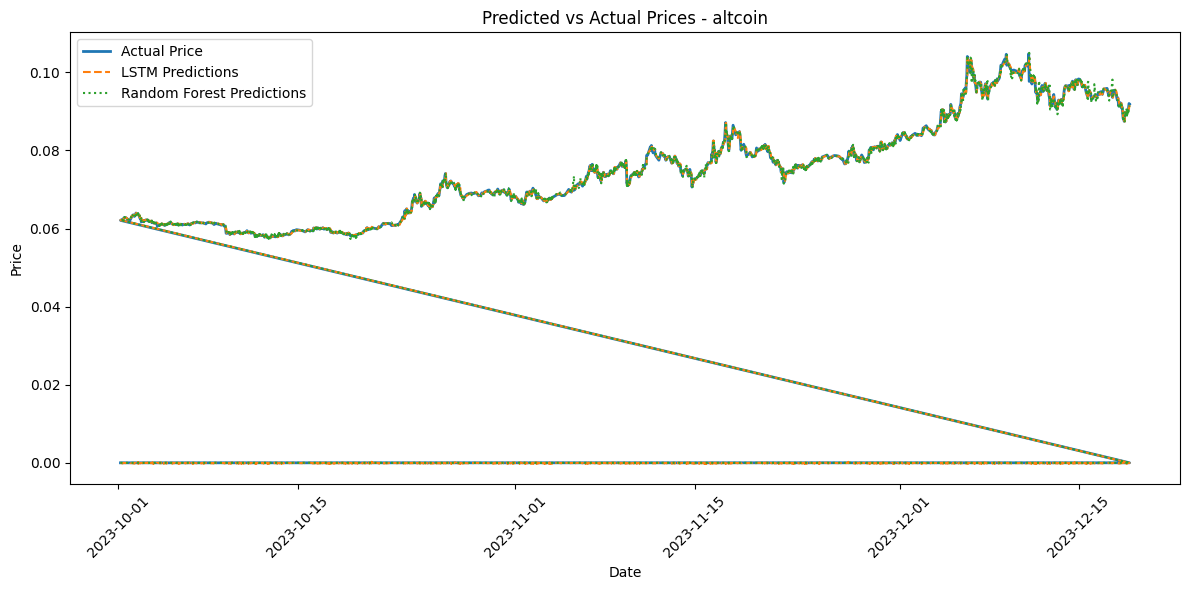

altcoin - LSTM RMSE: 0.00028952302059009205, Random Forest RMSE: 0.00036401655503440477

Processing category: nft
Original Prices (Before Scaling) for nft:
count    12297.000000
mean         0.455612
std          0.134139
min          0.272978
25%          0.358011
50%          0.431549
75%          0.512065
max          0.866258
Name: price_usd, dtype: float64
Scaling Range for nft Prices:
Original Min: 0.2862039899672092, Max: 18.652034598203024
Scaled Min: 0.0, Max: 1.0
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1361/1361 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0030 - val_loss: 2.0736e-06
Epoch 2/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.5051e-06 - val_loss: 1.7814e-06
Epoch 3/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.3902e-06 - val_loss: 1.4728e-06
Epoch 4/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.5768e-06 - val_loss: 3.4925e-06
Epoch 5/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.2916e-06 - val_loss: 4.2680e-07
Epoch 6/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.1833e-06 - val_loss: 1.2745e-06
Epoch 7/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.2457e-06 - val_loss: 1.9705e-06
Epoch 8/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.2556e-06 - val_loss: 1.9105e-06
Epoch 9/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 3.9750e-06 - val_loss: 3.3387e-06
Epoch 10/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.8931e-06 - val_loss: 2.6453e-07
Epoch 11/50
1361/1361 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step

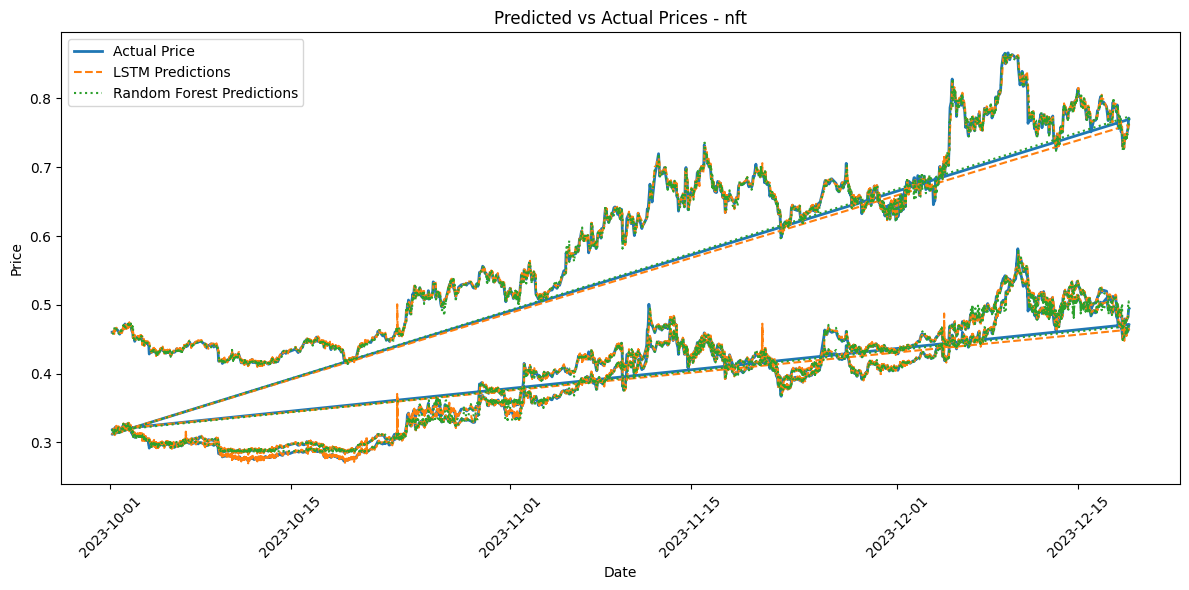

nft - LSTM RMSE: 0.0039343857204174855, Random Forest RMSE: 0.00441043210079023

Processing category: defi
Original Prices (Before Scaling) for defi:
count    12297.000000
mean        46.555458
std         34.187336
min          3.849914
25%          6.057228
50%         50.174104
75%         70.143845
max        116.423950
Name: price_usd, dtype: float64
Scaling Range for defi Prices:
Original Min: 3.4148724712077696, Max: 380.55993106370136
Scaled Min: 0.0, Max: 1.0
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1362/1362 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0052 - val_loss: 2.4091e-06
Epoch 2/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.2035e-05 - val_loss: 1.6717e-06
Epoch 3/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 9.4972e-06 - val_loss: 1.2266e-06
Epoch 4/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.4631e-06 - val_loss: 1.3189e-06
Epoch 5/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.4185e-06 - val_loss: 1.7074e-06
Epoch 6/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 8.6906e-06 - val_loss: 9.8412e-07
Epoch 7/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.3937e-06 - val_loss: 1.0344e-05
Epoch 8/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8.4907e-06 - val_loss: 2.1569e-06
Epoch 9/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 7.7936e-06 - val_loss: 8.9690e-07
Epoch 10/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 8.3380e-06 - val_loss: 1.1167e-06
Epoch 11/50
1362/1362 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/ste

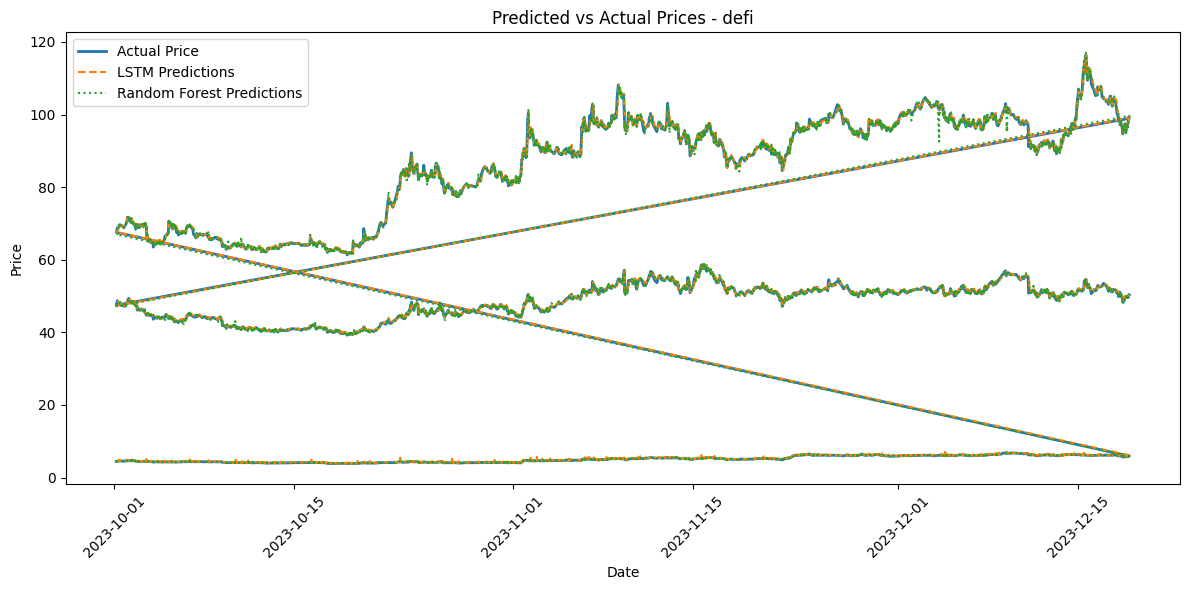

defi - LSTM RMSE: 0.3972867659595972, Random Forest RMSE: 0.4161300475150105

Processing category: bitcoin
Original Prices (Before Scaling) for bitcoin:
count     4099.000000
mean     35145.842937
std       5169.605117
min      26654.444856
25%      29600.295369
50%      35901.850451
75%      37828.443271
max      44480.376052
Name: price_usd, dtype: float64
Scaling Range for bitcoin Prices:
Original Min: 15670.07674767183, Max: 68623.5597632578
Scaled Min: 0.0, Max: 1.0000000000000002
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0290 - val_loss: 6.4806e-05
Epoch 2/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7650e-05 - val_loss: 1.7069e-05
Epoch 3/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7713e-05 - val_loss: 9.5415e-06
Epoch 4/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.7482e-05 - val_loss: 8.5151e-06
Epoch 5/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9847e-05 - val_loss: 1.3641e-05
Epoch 6/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.6690e-05 - val_loss: 8.1682e-06
Epoch 7/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5227e-05 - val_loss: 9.0642e-06
Epoch 8/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.5683e-05 - val_loss: 8.7895e-06
Epoch 9/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5810e-05 - val_loss: 6.3920e-06
Epoch 10/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5106e-05 - val_loss: 5.7699e-06
Epoch 11/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4630e-05 - 

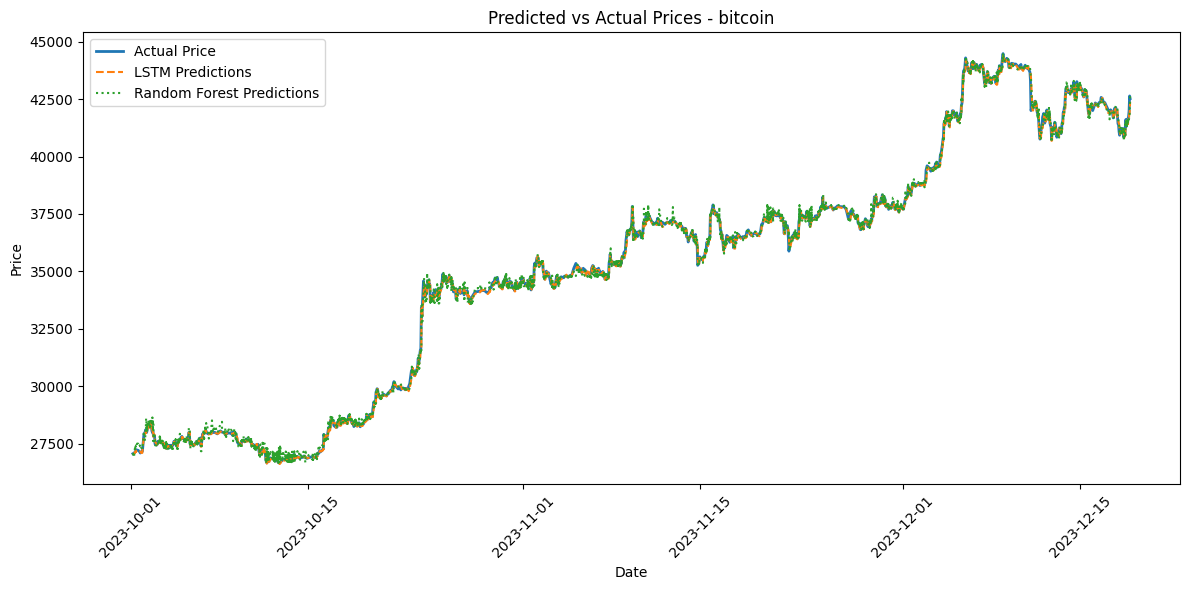

bitcoin - LSTM RMSE: 108.6045370298675, Random Forest RMSE: 160.59308827001215

Processing category: ethereum
Original Prices (Before Scaling) for ethereum:
count    4099.000000
mean     1915.583066
std       239.371873
min      1531.658309
25%      1678.084565
50%      1920.589139
75%      2088.573330
max      2383.630304
Name: price_usd, dtype: float64
Scaling Range for ethereum Prices:
Original Min: 926.4961794346096, Max: 4856.5768331933
Scaled Min: 0.0, Max: 0.9999999999999999
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0297 - val_loss: 1.9296e-05
Epoch 2/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.1074e-05 - val_loss: 8.7000e-06
Epoch 3/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.3538e-05 - val_loss: 7.2519e-06
Epoch 4/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.7696e-05 - val_loss: 6.2462e-06
Epoch 5/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.4219e-05 - val_loss: 6.2805e-06
Epoch 6/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7741e-05 - val_loss: 6.9408e-06
Epoch 7/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6263e-05 - val_loss: 4.9008e-06
Epoch 8/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3744e-05 - val_loss: 3.5163e-06
Epoch 9/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0941e-05 - val_loss: 3.7919e-06
Epoch 10/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.0299e-05 - val_loss: 5.3769e-06
Epoch 11/50
454/454 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.2086e-05 - 

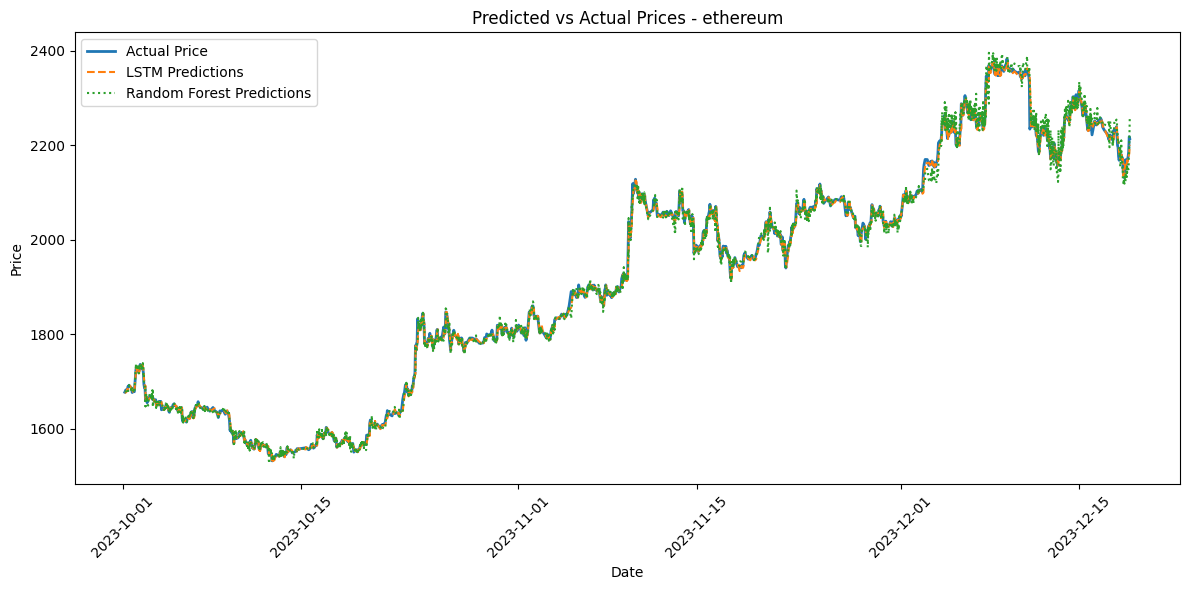

ethereum - LSTM RMSE: 7.005203025661731, Random Forest RMSE: 10.713547274328603


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

# Load the datasets
train_data = pd.read_csv("train_data.csv")
val_data = pd.read_csv("val_data.csv")
test_data = pd.read_csv("test_data.csv")

# Ensure datetime format
train_data['time'] = pd.to_datetime(train_data['time'])
val_data['time'] = pd.to_datetime(val_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

# Get unique categories for analysis
categories = test_data['category'].unique()

results = {}

# Corrected Scaling and Visualization with Debugging
for category in categories:
    print(f"\nProcessing category: {category}")

    # Filter data for this category
    train_category = train_data[train_data['category'] == category]
    val_category = val_data[val_data['category'] == category]
    test_category = test_data[test_data['category'] == category]

    # Define feature and target columns
    feature_columns = ['sentiment_polarity', 'sentiment_subjectivity',
                       'price_usd_lag1', 'price_usd_lag2', 'price_usd_lag3']
    target_column = 'price_usd'

    # Debug: Check original prices
    print(f"Original Prices (Before Scaling) for {category}:")
    print(test_category[target_column].describe())

    # Separate scalers for features and target
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()

    # Scale features and target separately
    train_features = feature_scaler.fit_transform(train_category[feature_columns])
    val_features = feature_scaler.transform(val_category[feature_columns])
    test_features = feature_scaler.transform(test_category[feature_columns])

    train_target = target_scaler.fit_transform(train_category[[target_column]])
    val_target = target_scaler.transform(val_category[[target_column]])
    test_target = target_scaler.transform(test_category[[target_column]])

    # Debug: Check scaling range
    print(f"Scaling Range for {category} Prices:")
    print(f"Original Min: {train_category[target_column].min()}, Max: {train_category[target_column].max()}")
    print(f"Scaled Min: {train_target.min()}, Max: {train_target.max()}")

    # Reshape features for LSTM input
    train_features_lstm = train_features.reshape(train_features.shape[0], 1, train_features.shape[1])
    val_features_lstm = val_features.reshape(val_features.shape[0], 1, val_features.shape[1])
    test_features_lstm = test_features.reshape(test_features.shape[0], 1, test_features.shape[1])

    # Train LSTM Model
    lstm_model = Sequential([
        LSTM(50, activation='relu', input_shape=(1, len(feature_columns))),
        Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mse')

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    lstm_model.fit(
        train_features_lstm, train_target,
        validation_data=(val_features_lstm, val_target),
        epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1
    )

    lstm_predictions = lstm_model.predict(test_features_lstm).flatten()

    # Train Random Forest Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(train_features, train_target.flatten())

    rf_predictions = rf_model.predict(test_features)

    # Inverse Transform Predictions and Target
    actual_prices = target_scaler.inverse_transform(test_target).flatten()
    lstm_prices = target_scaler.inverse_transform(lstm_predictions.reshape(-1, 1)).flatten()
    rf_prices = target_scaler.inverse_transform(rf_predictions.reshape(-1, 1)).flatten()

    # Debug: Check inverse transformation
    print(f"Inverse Transformed Prices (After Scaling) for {category}:")
    print(f"Actual Prices Min: {actual_prices.min()}, Max: {actual_prices.max()}")
    print(f"LSTM Predictions Min: {lstm_prices.min()}, Max: {lstm_prices.max()}")
    print(f"Random Forest Predictions Min: {rf_prices.min()}, Max: {rf_prices.max()}")

    # Plot Results
    plt.figure(figsize=(12, 6))
    plt.plot(test_category['time'], actual_prices, label='Actual Price', linewidth=2)
    plt.plot(test_category['time'], lstm_prices, label='LSTM Predictions', linestyle='dashed')
    plt.plot(test_category['time'], rf_prices, label='Random Forest Predictions', linestyle='dotted')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Predicted vs Actual Prices - {category}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Calculate RMSE
    lstm_rmse = np.sqrt(mean_squared_error(actual_prices, lstm_prices))
    rf_rmse = np.sqrt(mean_squared_error(actual_prices, rf_prices))
    print(f"{category} - LSTM RMSE: {lstm_rmse}, Random Forest RMSE: {rf_rmse}")


In [ ]:
!pip install transformers pandas tqdm

In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# Step 1: Load Datasets
news_file = "cryptonews.csv"
price_file = "combined_price_data.csv"

news_data = pd.read_csv(news_file)
price_data = pd.read_csv(price_file)

# Ensure proper datetime format
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')
price_data['time'] = pd.to_datetime(price_data['time'])

# Step 2: Initialize Pretrained Sentiment Analysis Pipeline
print("Loading sentiment analysis pipeline...")
sentiment_pipeline = pipeline("sentiment-analysis")

# Step 3: Batch Processing for Large Datasets
def batch_sentiment_analysis(data, text_column, batch_size=32):
    results = []
    for i in tqdm(range(0, len(data), batch_size), desc="Processing Sentiment Batches"):
        batch = data.iloc[i:i + batch_size]
        try:
            # Truncate text to the max input length of the model (512 tokens)
            sentiments = sentiment_pipeline(list(batch[text_column].apply(lambda x: str(x)[:512])))
            results.extend(sentiments)
        except Exception as e:
            print(f"Error processing batch {i}-{i+batch_size}: {e}")
            results.extend([{"label": None, "score": None}] * len(batch))
    return results

# Step 4: Apply Sentiment Analysis
print("Running sentiment analysis...")
sentiments = batch_sentiment_analysis(news_data, text_column='text')

# Add sentiment results to the dataset
news_data['sentiment_label'] = [s['label'] for s in sentiments]
news_data['sentiment_score'] = [s['score'] for s in sentiments]

# Step 5: Map Sentiment Labels to Numerical Values
label_mapping = {"NEGATIVE": -1, "NEUTRAL": 0, "POSITIVE": 1}
news_data['sentiment_value'] = news_data['sentiment_label'].map(label_mapping)

# Step 6: Save Intermediate Results
intermediate_output_file = "news_data_with_sentiments_intermediate.csv"
news_data.to_csv(intermediate_output_file, index=False)
print(f"Intermediate sentiment analysis results saved to {intermediate_output_file}")

# Step 7: Merge Sentiment Data with Price Data
# Round news timestamps to the nearest hour to match price data
news_data['rounded_time'] = news_data['date'].dt.round('H')

# Merge datasets
merged_data = pd.merge(price_data, news_data, left_on='time', right_on='rounded_time', how='left')

# Fill missing sentiment data with neutral defaults
merged_data['sentiment_label'].fillna("NEUTRAL", inplace=True)
merged_data['sentiment_score'].fillna(0.5, inplace=True)
merged_data['sentiment_value'].fillna(0, inplace=True)

# Step 8: Save the Merged Dataset
merged_output_file = "merged_price_news_sentiments.csv"
merged_data.to_csv(merged_output_file, index=False)
print(f"Merged dataset saved to {merged_output_file}")

# Step 9: Verification
print("\nSample of the Merged Dataset:")
print(merged_data[['time', 'price_usd', 'sentiment_label', 'sentiment_score', 'sentiment_value']].head())




In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
import pandas as pd
import torch

# Step 1: Prepare a Labeled Dataset (Mock Example)
# Replace this with your actual labeled dataset
data = {
    "text": [
        "Bitcoin price surged past $50,000 today, showing bullish momentum.",
        "Ethereum is struggling to maintain its current levels.",
        "The crypto market is facing massive sell-offs, causing prices to plummet.",
        "Investors are optimistic about the upcoming blockchain summit.",
        "Regulators are planning stricter policies for cryptocurrency trading.",
    ],
    "label": ["POSITIVE", "NEGATIVE", "NEGATIVE", "POSITIVE", "NEUTRAL"],
}
df = pd.DataFrame(data)

# Convert labels to numerical values
label_mapping = {"NEGATIVE": 0, "NEUTRAL": 1, "POSITIVE": 2}
df["label"] = df["label"].map(label_mapping)

# Step 2: Split Dataset into Training and Validation
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42
)

# Step 3: Load a Pretrained Model and Tokenizer
model_name = "distilbert-base-uncased"  # Use a smaller model for faster fine-tuning
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Tokenize the datasets
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=512)

# Convert to Torch Dataset
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_encodings, train_labels.tolist())
val_dataset = SentimentDataset(val_encodings, val_labels.tolist())

# Step 4: Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    evaluation_strategy="epoch",
)

# Define Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 5: Train the Model
trainer.train()

# Step 6: Save the Fine-Tuned Model
model_output_dir = "./fine_tuned_sentiment_model"
trainer.save_model(model_output_dir)
tokenizer.save_pretrained(model_output_dir)
print(f"Fine-tuned model saved to {model_output_dir}")

# Step 7: Use the Fine-Tuned Model in the Sentiment Pipeline
from transformers import pipeline

fine_tuned_pipeline = pipeline("sentiment-analysis", model=model_output_dir, tokenizer=model_output_dir)

# Test the pipeline
sample_texts = [
    "Bitcoin is seeing significant growth today!",
    "The crypto market has experienced a downturn.",
]
print("\nFine-Tuned Model Predictions:")
print(fine_tuned_pipeline(sample_texts))

## TEST THE DATASET AGAIN AFTER LLM SENTIMENT ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

# Load the datasets
train_data = pd.read_csv("train_data.csv")
val_data = pd.read_csv("val_data.csv")
test_data = pd.read_csv("test_data.csv")

# Ensure datetime format
train_data['time'] = pd.to_datetime(train_data['time'])
val_data['time'] = pd.to_datetime(val_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

# Get unique categories for analysis
categories = test_data['category'].unique()

# Process each category
for category in categories:
    print(f"\nProcessing category: {category}")

    # Filter data for this category
    train_category = train_data[train_data['category'] == category]
    val_category = val_data[val_data['category'] == category]
    test_category = test_data[test_data['category'] == category]

    # Define feature and target columns
    feature_columns = ['sentiment_value', 'sentiment_score', 'price_usd_lag1', 'price_usd_lag2', 'price_usd_lag3']
    target_column = 'price_usd'

    # Separate scalers for features and target
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()

    # Scale features and target separately
    train_features = feature_scaler.fit_transform(train_category[feature_columns])
    val_features = feature_scaler.transform(val_category[feature_columns])
    test_features = feature_scaler.transform(test_category[feature_columns])

    train_target = target_scaler.fit_transform(train_category[[target_column]])
    val_target = target_scaler.transform(val_category[[target_column]])
    test_target = target_scaler.transform(test_category[[target_column]])

    # Reshape features for LSTM input
    train_features_lstm = train_features.reshape(train_features.shape[0], 1, train_features.shape[1])
    val_features_lstm = val_features.reshape(val_features.shape[0], 1, val_features.shape[1])
    test_features_lstm = test_features.reshape(test_features.shape[0], 1, test_features.shape[1])

    # Train LSTM Model
    lstm_model = Sequential([
        LSTM(50, activation='relu', input_shape=(1, len(feature_columns))),
        Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mse')

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    lstm_model.fit(
        train_features_lstm, train_target,
        validation_data=(val_features_lstm, val_target),
        epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1
    )

    lstm_predictions = lstm_model.predict(test_features_lstm).flatten()

    # Train Random Forest Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(train_features, train_target.flatten())

    rf_predictions = rf_model.predict(test_features)

    # Inverse Transform Predictions and Target
    actual_prices = target_scaler.inverse_transform(test_target).flatten()
    lstm_prices = target_scaler.inverse_transform(lstm_predictions.reshape(-1, 1)).flatten()
    rf_prices = target_scaler.inverse_transform(rf_predictions.reshape(-1, 1)).flatten()

    # Plot Results
    plt.figure(figsize=(12, 6))
    plt.plot(test_category['time'], actual_prices, label='Actual Price', linewidth=2)
    plt.plot(test_category['time'], lstm_prices, label='LSTM Predictions', linestyle='dashed')
    plt.plot(test_category['time'], rf_prices, label='Random Forest Predictions', linestyle='dotted')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Predicted vs Actual Prices - {category}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Calculate RMSE
    lstm_rmse = np.sqrt(mean_squared_error(actual_prices, lstm_prices))
    rf_rmse = np.sqrt(mean_squared_error(actual_prices, rf_prices))
    print(f"{category} - LSTM RMSE: {lstm_rmse}, Random Forest RMSE: {rf_rmse}")

In [ ]:
# Generate News Embeddings
from sentence_transformers import SentenceTransformer
import pandas as pd

# Load the news dataset
news_data = pd.read_csv("cryptonews.csv")

# Use a pre-trained model for generating embeddings
print("Loading embedding model...")
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the title and text columns
print("Generating embeddings for titles and text...")
news_data['title_embedding'] = news_data['title'].apply(lambda x: model.encode(str(x)).tolist())
news_data['text_embedding'] = news_data['text'].apply(lambda x: model.encode(str(x)).tolist())

# Save the embeddings to avoid recomputation
news_data.to_csv("news_with_embeddings.csv", index=False)
print("News embeddings saved!")


Loading embedding model...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generating embeddings for titles and text...


In [ ]:
# Build a Retriver for RAG
import numpy as np
from datetime import timedelta

# Function to retrieve top-k similar news articles for a given cryptocurrency and time window
def retrieve_relevant_news(crypto_name, time_window, news_data, k=5):
    # Filter news data for the relevant time window and cryptocurrency
    relevant_news = news_data[
        (news_data['crypto'] == crypto_name) &
        (news_data['rounded_time'] >= time_window[0]) &
        (news_data['rounded_time'] <= time_window[1])
    ]

    # Compute average embedding for relevant news
    if not relevant_news.empty:
        embeddings = np.array(list(relevant_news['text_embedding']))
        avg_embedding = np.mean(embeddings, axis=0)
        return avg_embedding
    else:
        return np.zeros(384)  # Return a zero vector if no relevant news found

In [ ]:
# Integrate News Features into Merged Dataset
# Load datasets
merged_data = pd.read_csv("merged_price_news_data.csv")
news_data = pd.read_csv("news_with_embeddings.csv")

# Ensure proper datetime alignment
news_data['rounded_time'] = pd.to_datetime(news_data['rounded_time'])
merged_data['time'] = pd.to_datetime(merged_data['time'])

# Add aggregated news features
print("Adding news embeddings to the dataset...")
merged_data['news_embedding'] = merged_data.apply(
    lambda row: retrieve_relevant_news(
        row['crypto'],
        [row['time'] - timedelta(hours=6), row['time']],
        news_data
    ),
    axis=1
)

# Save the updated merged dataset
merged_data.to_csv("merged_data_with_news_features.csv", index=False)
print("Merged dataset with news features saved!")


In [ ]:
# Train the Enhanced LSTM Model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the merged dataset with news features
merged_data = pd.read_csv("merged_data_with_news_features.csv")

# Expand embeddings into separate columns
print("Expanding news embeddings...")
news_features = np.stack(merged_data['news_embedding'].apply(eval).values)
news_feature_columns = [f'news_emb_{i}' for i in range(news_features.shape[1])]
news_features_df = pd.DataFrame(news_features, columns=news_feature_columns)

# Concatenate with the original dataset
merged_data = pd.concat([merged_data.reset_index(drop=True), news_features_df], axis=1)

# Select features and target
feature_columns = ['price_usd', 'sentiment_polarity', 'sentiment_subjectivity'] + news_feature_columns
target_column = 'price_usd'

X = merged_data[feature_columns].values
y = merged_data[target_column].values

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape for LSTM
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_lstm = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Train LSTM Model
print("Training LSTM model...")
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate the model
print("Evaluating LSTM model...")
test_loss = model.evaluate(X_test_lstm, y_test, verbose=1)
print(f"Test Loss: {test_loss}")

# Predict on test data
y_pred = model.predict(X_test_lstm).flatten()

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Prices")
plt.plot(y_pred, label="Predicted Prices", linestyle='dashed')
plt.title("LSTM Model - Actual vs Predicted Prices")
plt.xlabel("Test Data Points")
plt.ylabel("Price")
plt.legend()
plt.show()